# 0. Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

ModuleNotFoundError: No module named 'seaborn'

# 1. Data Understanding

## Import Dataset

In [ ]:
# heart_data = pd.read_csv('/content/sample_data/heart.csv', header=0)
heart_data = pd.read_csv('/content/sample_data/heart.csv', header=0)
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Terdapat 14 atribut data:
1. `age` : umur dalam satuan tahun
2. `sex` : jenis kelamin (1 = laki-laki, 2 = perempuan)
3. `cp` : jenis nyeri dada yang dialami
- 1 = typical angina
- 2 = atypical angina
- 3 = non-anginal pain
- 4 = asymptomatic
4. `trestbps` : tekanan darah istirahat seseorang saat pertama kali masuk ke rumah sakit, yang diukur dalam satuan mm/Hg
5. `chol` : ukuran konsentrasi kolesterol dalam darah yang diukur dalam satuan mg/dL
6. `fbs`: kadar gula darah seseorang setelah berpuasa semalaman > 120mg/dL (1 = true, 0 = false)
7. `restecg` : hasil pemeriksaan EKG saat seseorang berada dalam keadaan istirahat
- 0 = normal
- 1 = adanya kelainan pada gelombang ST-T pada hasil EKG
- 2 = kemungkinan atau kepastian adanya hipertrofi ventrikel kiri berdasarkan kriteria Estes
8. `thalach` : denyut jantung maksimum yang dicapai selama aktivitas fisik
9. `exang` : angina pectoris (1 = true, 0 = false)
10. `oldpeak` : penurutan segmen ST pada EKG yang terjadi setelah aktivitas fisik dibandingkan saat keadaan istirahat
11. `slope` : kemiringan segmen ST pada EKG saat puncak kegiatan fisik
- 1 = upsloping
- 2 = flat
- 3 = downsloping
12. `ca` : jumlah pembuluh utama yang terlihat berwarna saat dilakukan prosedur fluoroskopi (0, 1, 2, 3)
13. `thal` :
- 0 = normal
- 1 = fixed defect
- 2 = reversable defect
14. `target` : diagnosis penyakit jantung berdasarkan hasil angiografi
- 0 = tingkat penyempitan diameter < 50%
- 1 = tingkat penyempitan diameter > 50%

In [ ]:
heart_data.shape

(1025, 14)

Dataset heart disease dari Kaggle ini memiliki 14 atribut data dengan 1025 data yang tercatat

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Preparation

## Missing Value

In [ ]:
# cek jumlah data yang hilang per kolom
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dari hasil di atas, terbukti tidak ada data yang hilang

## Duplicate Value

In [ ]:
# cek jumlah data yang terduplikasi
heart_data[heart_data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# menghitung berapa persentase data yang terduplikasi
heart_data.duplicated().\
sum()/len(heart_data)*100

70.53658536585365

Dari 1025 data terdapat 723 baris data yang terduplikasi, yang mencakup 70.5% dari total data.

In [ ]:
# menghapus data yang terduplikasi
heart_data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Setelah melakukan penghapusan data yang terduplikasi, baris data saat ini tinggal 302 baris

## Mengecek Apakah Ada Outlier di Atribut Numerik

Fungsi bernama `outlier_tretment` akan membantu menampilkan nilai yang berada di posisi kuartil 1 dan 3. Jika data berada di bawah kuartil 1 dan di atas kuartil 3, maka data tersebut dikategorikan sebagai data outlier

In [ ]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn, [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

### 1. Age

In [ ]:
# Menampilkan data kuartil 1, kuartil 3, dan jumlah outlier pada kolom age
lower_range, upper_range = outlier_treatment(heart_data.age)
print("Lowerbound (Q1): {0}\nUpperbound (Q3):{1}".format(lower_range, upper_range))
print("Outlier data in dataset: {} rows.\n".format(len(heart_data[(heart_data.age < lower_range) | (heart_data.age > upper_range)])))
heart_data[(heart_data.age < lower_range) | (heart_data.age > upper_range)]

Lowerbound (Q1): 28.5
Upperbound (Q3):80.5
Outlier data in dataset: 0 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


<Axes: xlabel='None', ylabel='age'>

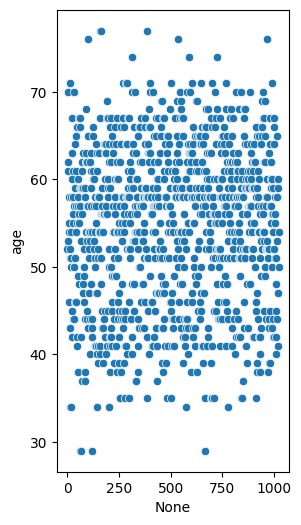

In [ ]:
fig, ax = plt.subplots(figsize=(3, 6)) #buat frame/figure
sns.scatterplot(data=heart_data, x=heart_data.index, y='age', ax=ax, color='#1f77b4')

<Axes: xlabel='age', ylabel='Count'>

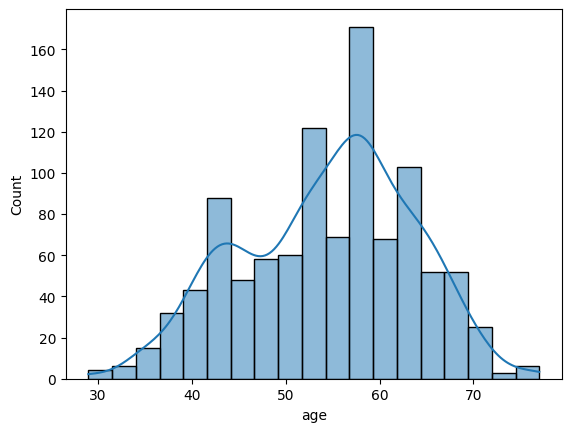

In [ ]:
sns.histplot(heart_data["age"], kde=True)

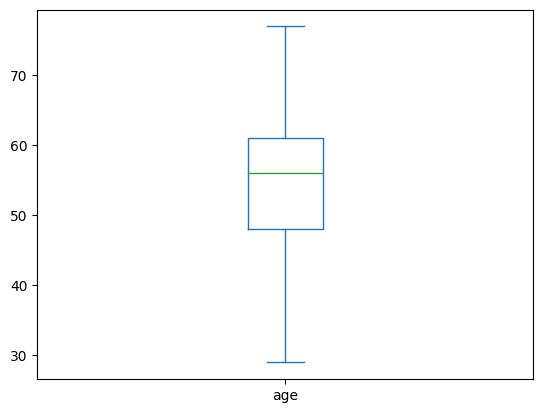

In [ ]:
heart_data.age.plot(kind = "box")
plt.show()

Lowerbound (Q1): 28.5
Upperbound (Q3):80.5
Outlier data in dataset: 0 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


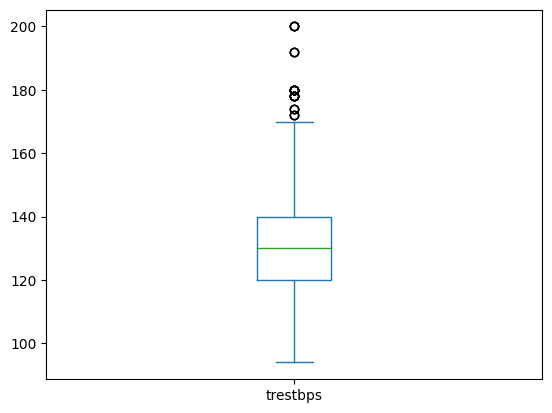

In [ ]:
heart_data.trestbps.plot(kind = "box")
plt.show()

In [ ]:
# menghitung jumlah outlier data
lower_range, upper_range = outlier_treatment(heart_data.trestbps)
print("Lowerbound (Q1): {0}\nUpperbound (Q3):{1}".format(lower_range, upper_range))
print("Outlier data in dataset: {} rows.\n".format(len(heart_data[(heart_data.trestbps < lower_range) | (heart_data.trestbps > upper_range)])))
heart_data[(heart_data.trestbps < lower_range) | (heart_data.trestbps > upper_range)]

Lowerbound (Q1): 90.0
Upperbound (Q3):170.0
Outlier data in dataset: 30 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [ ]:
# menghilangkan data outlier
# heart_data['trestbps'] = (heart_data.trestbps - heart_data.trestbps.mean())/heart_data.trestbps.std()
Q1 = heart_data['trestbps'].quantile(0.25)
Q3 = heart_data['trestbps'].quantile(0.75)

IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

heart_data['trestbps'] = np.where(heart_data['trestbps'] > upper,
                                  upper,
                                  np.where(
                                      heart_data['trestbps'] < lower,
                                      lower,
                                      heart_data['trestbps']
                                  ))

<Axes: xlabel='trestbps', ylabel='Count'>

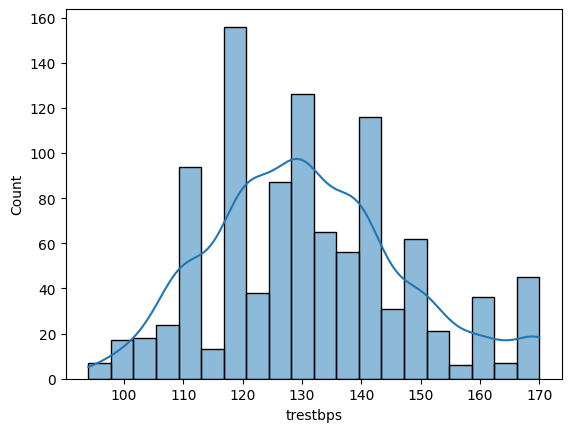

In [ ]:
sns.histplot(heart_data["trestbps"], kde=True)

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.260488,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,16.532208,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# menghitung jumlah outlier data
lower_range, upper_range = outlier_treatment(heart_data.chol)
print("Lowerbound (Q1): {0}\nUpperbound (Q3):{1}".format(lower_range, upper_range))
print("Outlier data in dataset: {} rows.\n".format(len(heart_data[(heart_data.chol < lower_range) | (heart_data.chol > upper_range)])))
heart_data[(heart_data.chol < lower_range) | (heart_data.chol > upper_range)]

Lowerbound (Q1): 115.0
Upperbound (Q3):371.0
Outlier data in dataset: 16 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140.0,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134.0,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150.0,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115.0,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150.0,407,0,0,154,0,4.0,1,3,3,0
542,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140.0,394,0,0,157,0,1.2,1,0,2,1


In [ ]:
lower_range, upper_range = outlier_treatment(heart_data.chol)
heart_data['chol'] = np.where(
          heart_data['chol'] > upper_range,
          upper_range,
          np.where(
              heart_data['chol'] < lower_range,
              lower_range,
              heart_data['chol'])
          )

<Axes: xlabel='chol', ylabel='Count'>

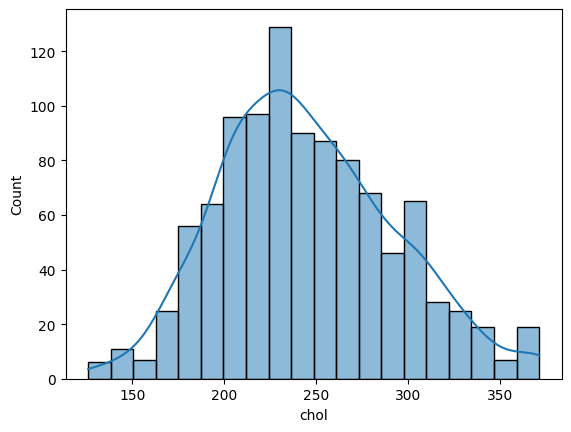

In [ ]:
sns.histplot(heart_data["chol"], kde=True)

In [ ]:
# menghitung jumlah outlier data
lower_range, upper_range = outlier_treatment(heart_data.chol)
print("Lowerbound (Q1): {0}\nUpperbound (Q3):{1}".format(lower_range, upper_range))
print("Outlier data in dataset: {} rows.\n".format(len(heart_data[(heart_data.chol < lower_range) | (heart_data.chol > upper_range)])))
heart_data[(heart_data.chol < lower_range) | (heart_data.chol > upper_range)]

Lowerbound (Q1): 115.0
Upperbound (Q3):371.0
Outlier data in dataset: 0 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


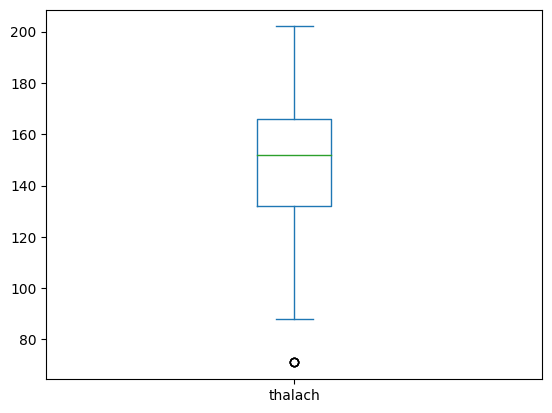

In [ ]:
heart_data.thalach.plot(kind = "box")
plt.show()

In [ ]:
# menghitung jumlah outlier data
lower_range, upper_range = outlier_treatment(heart_data.thalach)
print("Lowerbound (Q1): {0}\nUpperbound (Q3):{1}".format(lower_range, upper_range))
print("Outlier data in dataset: {} rows.\n".format(len(heart_data[(heart_data.thalach < lower_range) | (heart_data.thalach > upper_range)])))
heart_data[(heart_data.thalach < lower_range) | (heart_data.thalach > upper_range)]

Lowerbound (Q1): 81.0
Upperbound (Q3):217.0
Outlier data in dataset: 4 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120.0,237.0,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120.0,237.0,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120.0,237.0,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120.0,237.0,0,1,71,0,1.0,1,0,2,0


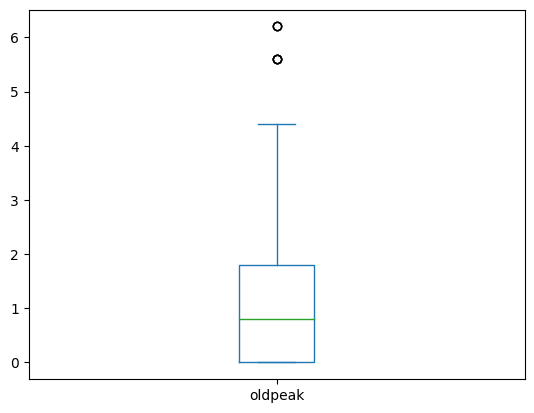

In [ ]:
heart_data.oldpeak.plot(kind = "box")
plt.show()

In [ ]:
# menghitung jumlah outlier data
lower_range, upper_range = outlier_treatment(heart_data.oldpeak)
print("Lowerbound (Q1): {0}\nUpperbound (Q3):{1}".format(lower_range, upper_range))
print("Outlier data in dataset: {} rows.\n".format(len(heart_data[(heart_data.oldpeak < lower_range) | (heart_data.oldpeak > upper_range)])))
heart_data[(heart_data.oldpeak < lower_range) | (heart_data.oldpeak > upper_range)]

Lowerbound (Q1): -2.7
Upperbound (Q3):4.5
Outlier data in dataset: 7 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,55,1,0,140.0,217.0,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140.0,217.0,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160.0,164.0,0,0,145,0,6.2,0,3,3,0
393,62,0,0,160.0,164.0,0,0,145,0,6.2,0,3,3,0
526,62,0,0,160.0,164.0,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140.0,217.0,0,1,111,1,5.6,0,0,3,0
833,55,1,0,140.0,217.0,0,1,111,1,5.6,0,0,3,0


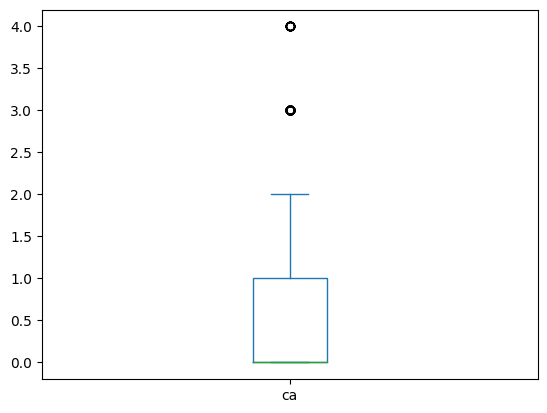

In [ ]:
heart_data.ca.plot(kind = "box")
plt.show()

In [ ]:
# menghitung jumlah outlier data
lower_range, upper_range = outlier_treatment(heart_data.ca)
print("Lowerbound (Q1): {0}\nUpperbound (Q3):{1}".format(lower_range, upper_range))
print("Outlier data in dataset: {} rows.\n".format(len(heart_data[(heart_data.ca < lower_range) | (heart_data.ca > upper_range)])))
heart_data[(heart_data.ca < lower_range) | (heart_data.ca > upper_range)]

Lowerbound (Q1): -1.5
Upperbound (Q3):2.5
Outlier data in dataset: 87 rows.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138.0,294.0,1,1,106,0,1.9,1,3,2,0
6,58,1,0,114.0,318.0,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140.0,298.0,0,1,122,1,4.2,1,3,3,0
52,38,1,2,138.0,175.0,0,1,173,0,0.0,2,4,2,1
53,49,1,2,120.0,188.0,0,1,139,0,2.0,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,62,1,2,130.0,231.0,0,1,146,0,1.8,1,3,3,1
993,43,1,0,132.0,247.0,1,0,143,1,0.1,1,4,3,0
1003,52,1,0,108.0,233.0,1,1,147,0,0.1,2,3,3,1
1013,58,1,0,114.0,318.0,0,2,140,0,4.4,0,3,1,0


## Imbalance Data

## Feature Encoding

# Exploratory Data Analysis (EDA)

# Feature Engineering

In [ ]:
# 1. BMI (Indeks Massa Tubuh)
heart_data['bmi'] = heart_data['chol'] / ((heart_data['age'] / 100) ** 2)

# 2. Kategori Tekanan Darah
threshold_low = 94
threshold_high = 200
heart_data['kategori_td'] = pd.cut(heart_data['trestbps'], bins=[0, threshold_low, threshold_high, np.inf], labels=['rendah', 'normal', 'tinggi'], right=False)

# 3. Rasio Kolesterol
heart_data['rasio_kolesterol'] = heart_data['chol'] / heart_data['thalach']

# 4. Kategori Usia
threshold_muda = 29
threshold_tua = 77
heart_data['kategori_usia'] = pd.cut(heart_data['age'], bins=[0, threshold_muda, threshold_tua, np.inf], labels=['muda', 'dewasa', 'lanjut usia'], right=False)

# 5. Angina Pektoris
angina_map = {1: 'angina tipikal', 2: 'angina atipikal', 3: 'nyeri non-anginal', 4: 'asimtomatik'}
heart_data['angina_pektoris'] = heart_data['cp'].map(angina_map) + ' ' + heart_data['exang'].map({1: 'ada', 0: 'tidak ada'})

# 6. Rasio Denyut Jantung
heart_data['rasio_denyut_jantung'] = heart_data['thalach'] / heart_data['restecg']

# 7. Kategori Depresi ST
threshold_low = 0
threshold_med = 0.8
threshold_high = 6
heart_data['kategori_depresi_st'] = pd.cut(heart_data['oldpeak'], bins=[-np.inf, threshold_low, threshold_med, threshold_high, np.inf], labels=['tidak ada', 'rendah', 'sedang', 'tinggi'], right=False)

# 8. Kombinasi EKG dan Kemiringan ST
ekg_map = {0: 'normal', 1: 'abnormalitas gelombang ST-T', 2: 'hipertrofi ventrikel kiri'}
slope_map = {1: 'menanjak', 2: 'datar', 3: 'menurun'}
heart_data['kombinasi_ekg_slope'] = heart_data['restecg'].map(ekg_map) + ' ' + heart_data['slope'].map(slope_map)

# 9. Jumlah Kelainan
heart_data['jumlah_kelainan'] = heart_data[['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].sum(axis=1)

# 10. Kategori Denyut Jantung Maksimum
threshold_low = 71
threshold_high = 202
heart_data['kategori_denyut_jantung_max'] = pd.cut(heart_data['thalach'], bins=[0, threshold_low, threshold_high, np.inf], labels=['rendah', 'normal', 'tinggi'], right=False)

# 11. Kombinasi Nyeri Dada dan EKG Saat Istirahat
chest_pain_map = {1: 'angina tipikal', 2: 'angina atipikal', 3: 'nyeri non-anginal', 4: 'asimtomatik'}
rest_ecg_map = {0: 'normal', 1: 'abnormalitas gelombang ST-T', 2: 'hipertrofi ventrikel kiri'}
heart_data['kombinasi_nyeri_dada_rest_ecg'] = heart_data['cp'].map(chest_pain_map) + ' ' + heart_data['restecg'].map(rest_ecg_map)

# Menampilkan DataFrame yang telah dimodifikasi
print(heart_data.tail())